In [5]:
import pymc3 as pm
import theano.tensor as T
from testhelper.posterior_plotters import plot_var
import numpy as np

In [26]:
with pm.Model():
    norm = pm.Normal(name='norm', mu=0.9, sd=0.005)
    norm_pos = T.maximum(0,norm)
    norm_logit = T.minimum(1,norm_pos)
    
    norm_det = pm.Deterministic('norm_det', norm_logit)
    trace = pm.sample(10000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [norm]
Sampling 2 chains: 100%|██████████| 21000/21000 [00:06<00:00, 3439.20draws/s]
The acceptance probability does not match the target. It is 0.8867309497848452, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8846316686955098, but should be close to 0.8. Try to increase the number of tuning steps.


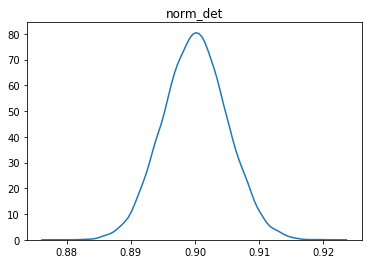

In [27]:
plot_var(trace, 'norm_det')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff171708c18>,
      dtype=object)

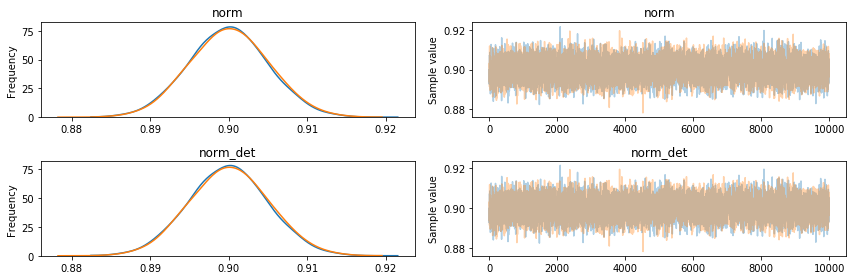

In [28]:
pm.traceplot(trace)

In [67]:
with pm.Model():
    normal = pm.Normal('Normal', mu=35, sd=4)
    normal_det = pm.Deterministic('normal_det', normal)
    uniform_observed = pm.Uniform('Uniform_obs', lower=32, upper=38, observed=normal_det)
    trace = pm.sample(10000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [Normal]
Sampling 2 chains: 100%|██████████| 21000/21000 [00:14<00:00, 1449.00draws/s]
There were 5495 divergences after tuning. Increase `target_accept` or reparameterize.
There were 5538 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff1555d5ac8>,
      dtype=object)

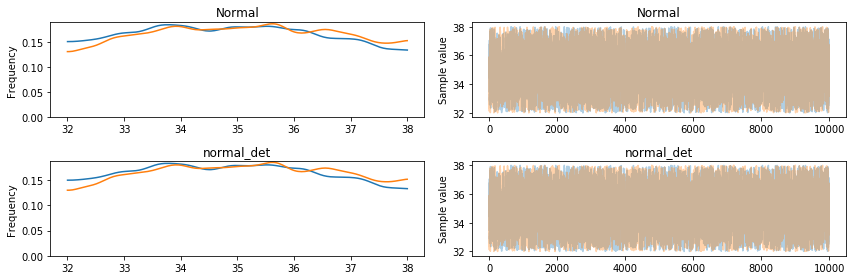

In [68]:
pm.traceplot(trace)